In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras import regularizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 22s 0us/step


In [3]:
# Checking the number of rows (records) and columns (features)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
# Checking the number of unique classes
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [5]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

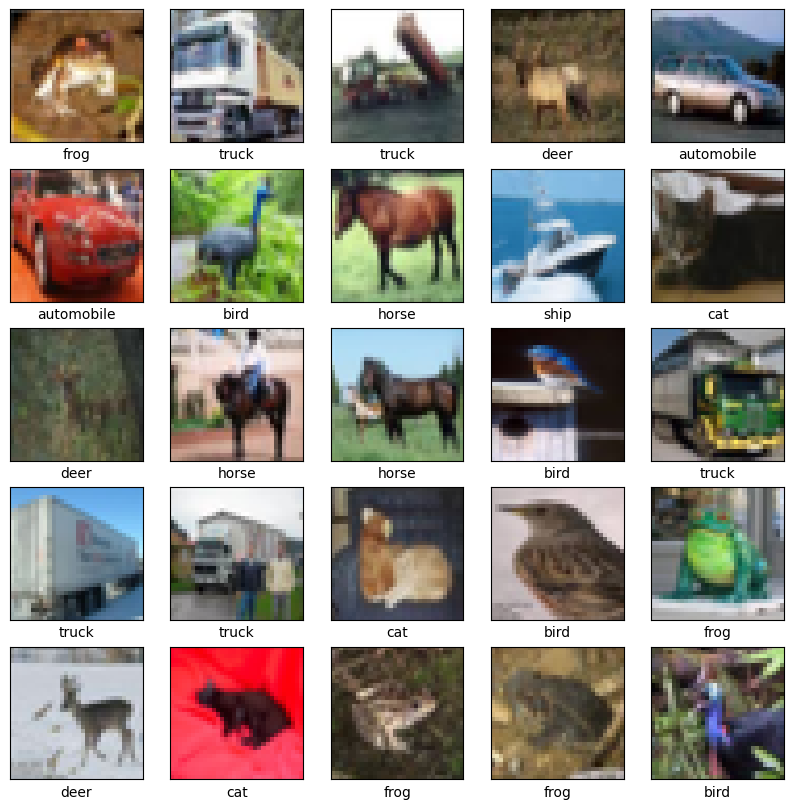

In [6]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [7]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255

# One hot encoding the target class (labels)
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [16]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False)

datagen.fit(train_images)

In [25]:
from keras import regularizers

model = Sequential()

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3), kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(num_classes, activation='softmax'))


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_21 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_22 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                      

In [26]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [27]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 5, min_lr = 0.00001)

history = model.fit(datagen.flow(test_images, test_labels, batch_size=64),
                    epochs = 100,
                    validation_data = (test_images, test_labels),
                    callbacks = [early_stopping, reduce_lr])
val_loss, val_acc = model.evaluate(test_images, test_labels)
print(f'Validation accuracy: {val_acc:.4f}')

Epoch 1/100
157/157 [==============================] - 11s 41ms/step - loss: 2.1128 - accuracy: 0.3527 - val_loss: 3.5568 - val_accuracy: 0.1288 - lr: 0.0010
Epoch 2/100
157/157 [==============================] - 6s 38ms/step - loss: 1.7112 - accuracy: 0.4469 - val_loss: 3.9002 - val_accuracy: 0.1455 - lr: 0.0010
Epoch 3/100
157/157 [==============================] - 6s 38ms/step - loss: 1.5350 - accuracy: 0.5041 - val_loss: 1.7212 - val_accuracy: 0.4123 - lr: 0.0010
Epoch 4/100
157/157 [==============================] - 6s 38ms/step - loss: 1.4033 - accuracy: 0.5537 - val_loss: 1.3048 - val_accuracy: 0.5970 - lr: 0.0010
Epoch 5/100
157/157 [==============================] - 6s 38ms/step - loss: 1.3121 - accuracy: 0.5840 - val_loss: 1.4137 - val_accuracy: 0.5707 - lr: 0.0010
Epoch 6/100
157/157 [==============================] - 6s 38ms/step - loss: 1.2268 - accuracy: 0.6213 - val_loss: 1.1712 - val_accuracy: 0.6510 - lr: 0.0010
Epoch 7/100
157/157 [==============================] - 6s

Text(0.5, 1.0, 'Loss Curves')

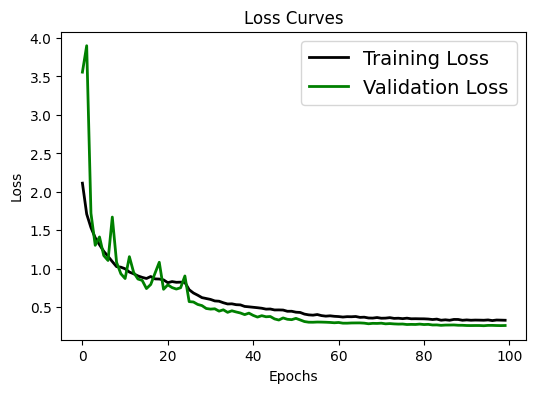

In [28]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

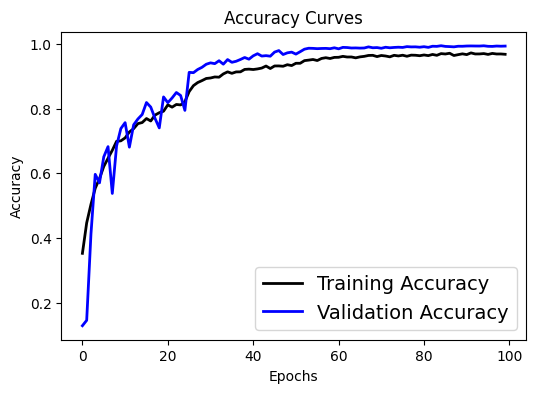

In [29]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [30]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 [==============================] - 1s 2ms/step
[[6.24006934e-05 1.33503581e-05 1.06861444e-05 ... 2.35732536e-08
  1.44884971e-05 3.25301608e-06]
 [2.59669804e-07 1.77634740e-03 3.20684090e-10 ... 3.07937287e-11
  9.98209238e-01 1.41720702e-05]
 [5.17495035e-04 5.15969098e-03 2.21668046e-07 ... 4.99950090e-08
  9.93503392e-01 8.15329782e-04]
 ...
 [7.26284796e-11 2.79894663e-10 3.10007022e-06 ... 7.14289172e-06
  1.81394322e-09 3.74773590e-09]
 [1.06030619e-07 9.99997973e-01 5.51670098e-07 ... 1.45902055e-08
  5.82443871e-10 1.16814235e-07]
 [3.22992065e-07 2.53312896e-06 1.76507513e-07 ... 9.99990106e-01
  5.73841028e-08 4.17330348e-09]]
[3 8 8 ... 5 1 7]


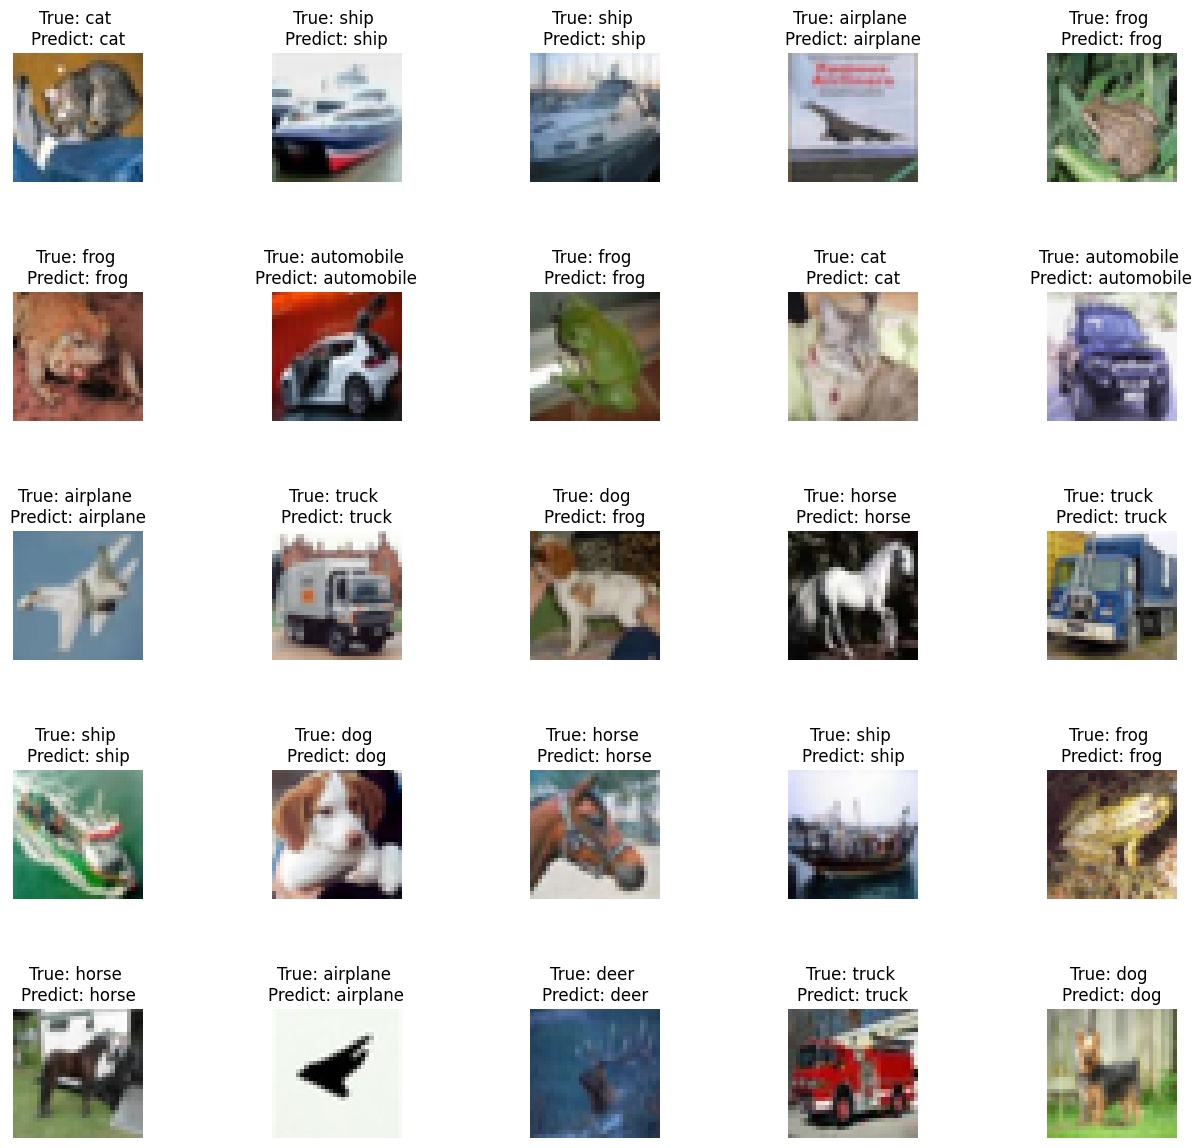

In [31]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [32]:
#YEQING CHEN 6420167